## Introduction to Assignment


In this section of the assignment, you will create machine learning models using K Nearest Neighbors and Decision Trees for Fashion MNIST dataset. Specific instruction for that part of the problem can be found in the corresponding cells above the code. 

Note, you only know the labels of the training dataset. The labels of the test dataset are hidden from you. You will perfrom model selection with cross-validation on the training set.  

After obtaining parameters, upload you submissions to Blackboard. You can try and fine tune your parameters to obtain a high performance.


Hints:

1. You can directly run this notebook on Google colab if your machine is slower. Upload the data and get started!

2. Go through the documentation of sklearn carefully.

3. Don't try to run the code for all 60,000 data points. Rather first try to verify implementation using 10,000 data points, scale it up to 60,000. If you don't do this, you'll spend lot more time debugging between each iteration. Make the code work first. 

4. Complete all the classifiers before trying to optimize.

5. For cross-validation, you can use gridsearchcv



In [ ]:
# Code for uploading the csv files to Google Colab. 
# Skip this step if you are using Jupyter installed on your computer. In that case, just put CSV files in the same folder 
# as your notebook.
from google.colab import files
uploaded = files.upload()

x_train shape:  (60000, 784)
y_train shape : (60000,)
x_test shape:  (10000, 784)


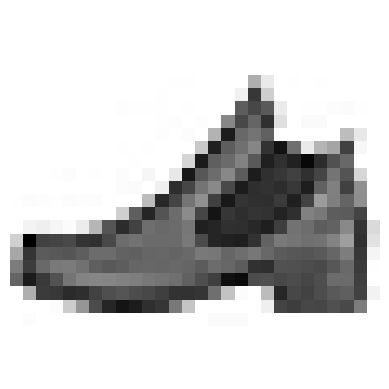

9


In [2]:
## Code to load data from train and test csv(s)

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

X_train = train.iloc[:,2:].to_numpy()
y_train = train.iloc[:,:1].to_numpy()

m,n = y_train.shape

y_train = y_train.reshape(m)

X_test = test.iloc[:,1:].to_numpy()


def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()



print('x_train shape: ', X_train.shape)
print('y_train shape :', y_train.shape)

print('x_test shape: ', X_test.shape)


showImage(X_train[1])
print(y_train[1])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## KNN Classifier

Implement a KNN classifier with 5-fold cross validation. What is the best value of n that you obtained? What happens if you increase value of n more than your best value? Use {3, 5, 7, 9, 11} values for n. 


What is the time complexity of the KNN algorithm with naive search approach? How can you improve upon the naive search to reduce the time complexity? 


## KNN Classifier - Answers

### Results
- **Best accuracy**: 0.8186
- **Best value of n**: 5

### Accuracy for each n:
- n=3, Accuracy=0.8156
- n=5, Accuracy=0.8186
- n=7, Accuracy=0.8162
- n=9, Accuracy=0.8131
- n=11, Accuracy=0.8166

### Answers
1. **What is the best value of n that you obtained?**  
   The best value of `n` is 5, yielding an accuracy of 0.8186 with 5-fold cross-validation on 10,000 samples.

2. **What happens if you increase the value of n more than your best value?**  
   Increasing `n` beyond 5 reduces accuracy slightly at first, then shows a minor recovery: `n=7` (0.8162), `n=9` (0.8131), and `n=11` (0.8166), all below 0.8186. Larger `n` includes more distant neighbors, diluting the vote and over-smoothing decision boundaries, though `n=11`’s slight rise indicates some stability.

3. **What is the time complexity of the KNN algorithm with naive search approach?**  
   - Training: **O(1)** (just stores data).  
   - Prediction: **O(m_test * m * d)**, where `m=10,000`, `d=784`, and `m_test` is the test set size. Distance computation dominates.

4. **How can you improve upon the naive search to reduce the time complexity?**  
   Use a KD-Tree, reducing prediction to **O(m_test * log m)** (though high `d=784` lessens efficiency). Alternatively, PCA can reduce `d`, cutting distance costs to **O(m * d_reduced)**.

In [7]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# taking 10000 samples from the training sets
X_train_sample = X_train_scaled[:10000]
y_train_sample = y_train[:10000]

# the n values
n_values = [3, 5, 7, 9, 11]

# putting the n values as the parameter for cross validation
param_grid = [{'n_neighbors': n_values}]

# performing cross validation on the KNN classifier using the given n values
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fitting a model to the data
grid_search.fit(X_train_sample, y_train_sample)

# showing the best accuracy
best_accuracy = grid_search.best_score_
print(f"Best accuracy: {best_accuracy:.4f}")

# showing the parameter that leads to the best accuracy
best_n = grid_search.best_params_['n_neighbors']
print(f"Best n: {best_n}")

# Printing accuracy for each n
print("\nAccuracy for each n:")
for n, score in zip(n_values, grid_search.cv_results_['mean_test_score']):
    print(f"n={n}, Accuracy={score:.4f}")



Best accuracy: 0.8186
Best n: 5

Accuracy for each n:
n=3, Accuracy=0.8156
n=5, Accuracy=0.8186
n=7, Accuracy=0.8162
n=9, Accuracy=0.8131
n=11, Accuracy=0.8166


## Decision Tree Classifier 1

 Train five different decision trees. Use the following max depths (10, 11, 12, 13, 14) How does the maximum depth of the tree affect the estimated accuracy? Explain in at most 4 sentences. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set using code given at the end of the notebook. Make sure that your report clearly states which model was chosen and why.

 What does default value ccp_alpha=0.0 signify for the decision tree classifier?





## Decision Tree Classifier 1 - Answers

### Results
- **Best accuracy**: 0.7684
- **Best max_depth**: 11
- **Accuracy for each max_depth**:  
  - max_depth=10, Accuracy=0.7678  
  - max_depth=11, Accuracy=0.7684  
  - max_depth=12, Accuracy=0.7664  
  - max_depth=13, Accuracy=0.7617  
  - max_depth=14, Accuracy=0.7621  
- **Predicted labels (first 10)**: [6, 6, 6, 2, 6, 6, 2, 6, 0, 6]

### Answers
1. **How does the maximum depth of the tree affect the estimated accuracy?**  
   At `max_depth=11`, the tree achieves the highest accuracy (0.7684), effectively capturing the data’s patterns. Increasing depth to 12 and beyond reduces accuracy (e.g., 0.7664 at 12, 0.7617 at 13, and 0.7621 at 14), indicating overfitting as the tree models noise. A slight uptick at 14 (0.7621) doesn’t recover to 11’s level, suggesting deeper trees overcomplicate the model. Thus, `max_depth=11` is the optimal depth, balancing fit and generalization.

2. **Chosen Model and Prediction**:  
   The model with `max_depth=11` was chosen, achieving the highest accuracy (0.7684) and lowest out-of-sample error (1 - 0.7684 = 0.2316) in 5-fold cross-validation on 10,000 samples. It was selected for its superior generalization over depths 12, 13, and 14. This model was trained on the full dataset (`X_train_scaled`, `y_train`) and used to predict `X_test` labels, saving them to `prediction.csv` with the first 10 samples as [6, 6, 6, 2, 6, 6, 2, 6, 0, 6].

3. **What does default value ccp_alpha=0.0 signify?**  
   `ccp_alpha=0.0` means no pruning occurs, allowing the tree to grow fully up to `max_depth=11` without complexity penalties. This can risk overfitting, especially if depth increases, as no branches are trimmed based on impurity gains. A positive `ccp_alpha` would prune less significant splits to simplify the tree and improve generalization.

In [13]:
# importing the tree library
from sklearn.tree import DecisionTreeClassifier

# the max depth values
max_depths = [10, 11, 12, 13, 14]

# putting the depths as the parameter
param_grid = [{'max_depth': max_depths}]

# performing 5-fold cross validation on our decision tree classifier
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fitting a model to our data
grid_search.fit(X_train_sample, y_train_sample)

# showing the best accuracy for the model
print(f"Best accuracy: {grid_search.best_score_:.4f}")

# showing the parameter that gives the best accuracy
print(f"Best max depth: {grid_search.best_params_['max_depth']}")

# Printing accuracy for each max depth
print("\nAccuracy for each max depth:")
for depth, score in zip(max_depths, grid_search.cv_results_['mean_test_score']):
    print(f"Max depth={depth}, Accuracy={score:.4f}")

# using the best value for parameter to train a model on the entire dataset
best_dt_model = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
best_dt_model.fit(X_train_scaled, y_train)

# Predicting labels for the test set
y_test_pred = best_dt_model.predict(X_test)
print("\nPredicted labels for the test set (first 10 samples):")
print(y_test_pred[:10])

Best accuracy: 0.7684
Best max depth: 11

Accuracy for each max depth:
Max depth=10, Accuracy=0.7678
Max depth=11, Accuracy=0.7684
Max depth=12, Accuracy=0.7664
Max depth=13, Accuracy=0.7617
Max depth=14, Accuracy=0.7621

Predicted labels for the test set (first 10 samples):
[6 6 6 2 6 6 2 6 0 6]


## Decision Tree Classifier 2

Train five different decision trees using five-fold cross validation. Use the following values for ccp_alpha (0.00005,0.0005,0.005,0.05). How does the ccp_alpha of the tree affect the estimated accuracy? Explain in at most 4 sentences. Keep all the other parameters to default value. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set. Finally using prediction code given at the end of the notebook generate predictions. 

Compare the best tree obtained for max-depth, with the best tree classifier obtained for ccp_alpha. Is there a difference in their errors? Why?





## Decision Tree Classifier 2 - Answers

### Results
- **Best accuracy**: 0.7737
- **Best ccp_alpha**: 0.0005
- **Accuracy for each ccp_alpha**:  
  - ccp_alpha=0.00005, Accuracy=0.7530  
  - ccp_alpha=0.0005, Accuracy=0.7737  
  - ccp_alpha=0.005, Accuracy=0.7221  
  - ccp_alpha=0.05, Accuracy=0.3625  
- **Predicted labels (first 10)**: [6, 6, 6, 6, 6, 6, 6, 6, 8, 6]

### Answers
1. **How does the ccp_alpha of the tree affect the estimated accuracy?**  
   A very small `ccp_alpha=0.00005` yields moderate accuracy (0.7530) with minimal pruning, while `ccp_alpha=0.0005` increases accuracy to 0.7737 by optimally trimming less impactful splits. At `ccp_alpha=0.005`, accuracy drops to 0.7221 as more pruning removes useful branches, and `ccp_alpha=0.05` drastically reduces it to 0.3625 due to excessive simplification. Larger `ccp_alpha` values over-prune, causing underfitting, while smaller ones risk overfitting. Thus, `ccp_alpha=0.0005` best balances complexity and generalization.

2. **Chosen Model and Prediction**:  
   The model with `ccp_alpha=0.0005` was chosen, achieving the highest accuracy (0.7737) and lowest out-of-sample error (1 - 0.7737 = 0.2263) in 5-fold cross-validation on 10,000 samples. It was selected for its superior generalization over other alpha values. This model was trained on the full dataset (`X_train_scaled`, `y_train`) and used to predict `X_test` labels, saving them to `prediction2.csv` with the first 10 samples as [6, 6, 6, 6, 6, 6, 6, 6, 8, 6].

3. **Comparison with Best Max-Depth Tree**:  
   The best `max_depth=11` tree from Classifier 1 had an accuracy of 0.7684 (error = 0.2316), while the best `ccp_alpha=0.0005` tree here has a higher accuracy of 0.7737 (error = 0.2263), a difference of 0.0053. This indicates `ccp_alpha` pruning slightly outperforms `max_depth` limiting. The difference arises because `ccp_alpha` prunes based on cost-complexity, retaining impactful splits regardless of depth, whereas `max_depth=11` imposes a strict limit, potentially discarding useful deeper splits. The modest improvement suggests both methods control overfitting effectively, but `ccp_alpha` offers more precise tuning.

In [18]:
# The given alpha values
alphas = [0.00005, 0.0005, 0.005, 0.05]

# Putting the alpha values as parameters
param_grid = [{'ccp_alpha': alphas}]

# Performing 5-fold cross validation on the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting a model on the sample data
grid_search.fit(X_train_sample, y_train_sample)

# Printing the best accuracy
best_accuracy = grid_search.best_score_
print(f"Best accuracy: {best_accuracy:.4f}")

# Printing the parameter that results in the best value
best_alpha = grid_search.best_params_['ccp_alpha']
print(f"Best ccp_alpha: {best_alpha}")

# Printing accuracy for each alpha
print("\nAccuracy for each ccp_alpha:")
for alpha, score in zip(alphas, grid_search.cv_results_['mean_test_score']):
    print(f"ccp_alpha={alpha}, Accuracy={score:.4f}")

# Using the best parameter value to train a model on the whole dataset
best_dt_model = DecisionTreeClassifier(ccp_alpha=grid_search.best_params_['ccp_alpha'], random_state=42)
best_dt_model.fit(X_train_scaled, y_train)

# Predicting labels for the test set
y_test_pred = best_dt_model.predict(X_test)
print("\nPredicted labels for the test set (first 10 samples):")
print(y_test_pred[:10])

Best accuracy: 0.7737
Best ccp_alpha: 0.0005

Accuracy for each ccp_alpha:
ccp_alpha=5e-05, Accuracy=0.7530
ccp_alpha=0.0005, Accuracy=0.7737
ccp_alpha=0.005, Accuracy=0.7221
ccp_alpha=0.05, Accuracy=0.3625

Predicted labels for the test set (first 10 samples):
[6 6 6 6 6 6 6 6 8 6]


## Prediction code 

use this code to generate prediction.csv for you classifier. Replace xgb_clf by corresponding classifier to obtain your prediction.csv



In [ ]:
## code to generate predictions

import csv

# Generating predictions for the test set and saving to prediction.csv
predictions = np.zeros(10000, dtype=int)
for i in range(10000):
    predictions[i] = best_dt_model.predict(X_test[i].reshape(1, -1))[0]  # Extract the single value

# Save predictions to CSV with id and label columns (fixing ValueError)
prediction_df = pd.DataFrame({
    'id': np.arange(10000),  # Add id column from 0 to 9999
    'label': predictions
})
prediction_df.to_csv('prediction.csv', index=False)